##Step 3 - Determine the relationships between dependent and independent variables
The frequency of a value represents the number of times a value occurs in a data set. Compute the
frequency of each value associated with each dependent variable (listed in Step 1) as a function of all of
the protected class variables (independent variables) identified in Step 2. Create table(s) and histogram(s)
comparing the frequency values of the dependent variable as a function of the independent variable. Hint:
For variables that are continuous, you might consider creating intervals that represent the data. For
categorical/ordinal/nominal values, you might consider converting to numerical values based on a
reasonable (albeit subjective) ordering.

In [114]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [115]:
#Read dataframe

df = pd.read_csv('deaths-in-custody.csv')

In [116]:
#View CSV
df

,record_key_number,reporting_agency,agency_number,agency_full_name,county,race,gender,age,custody_status,custody_offense,date_of_death_yyyy,date_of_death_mm,date_of_death_dd,custodial_responsibilty_at_time_of_death,location_where_cause_of_death_occurred,facility_of_death,manner_of_death,means_of_death
0,2005001,State,27025C,Salinas Valley State Prison,Monterey,Other,Male,35,Sentenced,110,2005,1,3,CDC/CRC,Living,CDC/CRC,Suicide,"Hanging,Strangulation"
1,2005002,Police,390200,Lodi Police Department,San Joaquin,White,Male,67,Awaiting Booking,46,2005,1,5,City Jail,Living,City Jail,Natural,Not Applicable
2,2005003,State,48015C,California Medical Facility,Solano,White,Male,51,Sentenced,110,2005,1,6,CDC/CRC,Not Applicable,CDC/CRC,Natural,Not Applicable
3,2005004,State,15025C,Wasco State Prison,Kern,Hispanic,Male,50,Sentenced,501,2005,1,6,CDC/CRC,Not Applicable,Local Hospital,Natural,Not Applicable
4,2005005,State,34065C,"California State Prison, Sacramento",Sacramento,White,Male,53,Sentenced,800,2005,1,9,CDC/CRC,Not Applicable,Local Hospital,Natural,Not Applicable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8368,2016687,Sheriff,570000,Yolo County Sheriff's Department,Yolo,White,Female,53,Awaiting Booking,0,2016,8,15,County Jail,Other,County Jail,Accidental,Drug Overdose
8369,2016688,Police,370500,El Cajon Police Department,San Diego,Black,Male,38,Process of Arrest,0,2016,9,27,Process of Arrest,Crime/Arrest Scene,Local Hospital,Homicide Justified (Law Enforcement Staff),Handgun
8370,2016689,Police,310300,Lincoln Police Department,Placer,White,Male,37,Process of Arrest,341,2016,10,25,Process of Arrest,Crime/Arrest Scene,Crime/Arrest Scene,Homicide Justified (Law Enforcement Staff),Handgun
8371,2016690,State,36015C,California Institution for Men,San Bernardino,White,Male,76,Sentenced,501,2016,10,30,CDC/CRC,Not Applicable,Local Hospital,Natural,Not Applicable


In [117]:
# view information about the dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8373 entries, 0 to 8372
Data columns (total 18 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   record_key_number                         8373 non-null   int64 
 1   reporting_agency                          8373 non-null   object
 2   agency_number                             8373 non-null   object
 3   agency_full_name                          8373 non-null   object
 4   county                                    8373 non-null   object
 5   race                                      8373 non-null   object
 6   gender                                    8373 non-null   object
 7   age                                       8373 non-null   object
 8   custody_status                            8373 non-null   object
 9   custody_offense                           8373 non-null   int64 
 10  date_of_death_yyyy                        8373 n

In [118]:
# Run summary statistics on the dataframe
df.describe()

,record_key_number,custody_offense,date_of_death_yyyy,date_of_death_mm,date_of_death_dd
count,8.373000e+03,8373.000000,8373.000000,8373.000000,8373.000000
mean,2.010945e+06,418.987579,2010.594649,6.455153,15.568016
std,3.463291e+03,273.742306,3.447931,3.443982,8.845954
min,2.005001e+06,0.000000,2005.000000,1.000000,1.000000
25%,2.008037e+06,160.000000,2008.000000,3.000000,8.000000
50%,2.011113e+06,341.000000,2011.000000,7.000000,16.000000
75%,2.014058e+06,700.000000,2014.000000,9.000000,23.000000
max,2.016691e+06,998.000000,2016.000000,12.000000,31.000000


In [119]:
# View the race count in the dataset
race_count = df['race'].value_counts().to_frame()
race_count.rename(columns={'race':'race_count'}, inplace=True)

race_count

,race_count
White,3440
Hispanic,2494
Black,1972
Other,137
American Indian,80
Other Asian,61
Filipino,55
Vietnamese,35
Pacific Islander,19
Asian Indian,18


In [120]:
#Group manner_of_death by race
df.groupby(['race'])['manner_of_death'].count()

race
American Indian       80
Asian Indian          18
Black               1972
Cambodian              5
Chinese               15
Filipino              55
Guamanian              3
Hawaiian               1
Hispanic            2494
Japanese               4
Korean                16
Laotian               10
Other                137
Other Asian           61
Pacific Islander      19
Samoan                 8
Vietnamese            35
White               3440
Name: manner_of_death, dtype: int64

In [121]:
# Show the count for the grouping of manner of death by race
df.groupby(['race','manner_of_death'], axis='rows')['manner_of_death'].count()

race             manner_of_death                           
American Indian  Accidental                                       6
                 Homicide Justified (Law Enforcement Staff)       6
                 Homicide Willful (Other Inmate)                  3
                 Natural                                         50
                 Pending Investigation                            3
                                                               ... 
White            Homicide Willful (Other Inmate)                 97
                 Natural                                       2142
                 Other                                           10
                 Pending Investigation                           83
                 Suicide                                        419
Name: manner_of_death, Length: 96, dtype: int64

In [122]:
#Group manner_of_death by race and return total counts
df.groupby(['manner_of_death'])['race'].count()

manner_of_death
Accidental                                     683
Cannot be Determined                           115
Execution                                        1
Homicide Justified (Law Enforcement Staff)    1269
Homicide Justified (Other Inmate)                3
Homicide Willful (Law Enforcement Staff)         4
Homicide Willful (Other Inmate)                229
Natural                                       4935
Other                                           28
Pending Investigation                          250
Suicide                                        856
Name: race, dtype: int64

In [123]:
 #Create a race_cat column in the dataframe by copying the contents of the race column to it
 df['race_cat'] = df['race']
 df

,record_key_number,reporting_agency,agency_number,agency_full_name,county,race,gender,age,custody_status,custody_offense,date_of_death_yyyy,date_of_death_mm,date_of_death_dd,custodial_responsibilty_at_time_of_death,location_where_cause_of_death_occurred,facility_of_death,manner_of_death,means_of_death,race_cat
0,2005001,State,27025C,Salinas Valley State Prison,Monterey,Other,Male,35,Sentenced,110,2005,1,3,CDC/CRC,Living,CDC/CRC,Suicide,"Hanging,Strangulation",Other
1,2005002,Police,390200,Lodi Police Department,San Joaquin,White,Male,67,Awaiting Booking,46,2005,1,5,City Jail,Living,City Jail,Natural,Not Applicable,White
2,2005003,State,48015C,California Medical Facility,Solano,White,Male,51,Sentenced,110,2005,1,6,CDC/CRC,Not Applicable,CDC/CRC,Natural,Not Applicable,White
3,2005004,State,15025C,Wasco State Prison,Kern,Hispanic,Male,50,Sentenced,501,2005,1,6,CDC/CRC,Not Applicable,Local Hospital,Natural,Not Applicable,Hispanic
4,2005005,State,34065C,"California State Prison, Sacramento",Sacramento,White,Male,53,Sentenced,800,2005,1,9,CDC/CRC,Not Applicable,Local Hospital,Natural,Not Applicable,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8368,2016687,Sheriff,570000,Yolo County Sheriff's Department,Yolo,White,Female,53,Awaiting Booking,0,2016,8,15,County Jail,Other,County Jail,Accidental,Drug Overdose,White
8369,2016688,Police,370500,El Cajon Police Department,San Diego,Black,Male,38,Process of Arrest,0,2016,9,27,Process of Arrest,Crime/Arrest Scene,Local Hospital,Homicide Justified (Law Enforcement Staff),Handgun,Black
8370,2016689,Police,310300,Lincoln Police Department,Placer,White,Male,37,Process of Arrest,341,2016,10,25,Process of Arrest,Crime/Arrest Scene,Crime/Arrest Scene,Homicide Justified (Law Enforcement Staff),Handgun,White
8371,2016690,State,36015C,California Institution for Men,San Bernardino,White,Male,76,Sentenced,501,2016,10,30,CDC/CRC,Not Applicable,Local Hospital,Natural,Not Applicable,White


In [124]:
# Create a group for the "other" races and add the grouping to the race_cat column earlier created

df_clean = df.copy()

race_list = ['American Indian', 'Asian Indian', 'Cambodian', 'Chinese', 'Filipino', 
             'Guamanian', 'Hawaiian', 'Japanese', 'Korean', 'Laotian', 'Other', 
             'Other Asian', 'Pacific Islander', 'Samoan', 'Vietnamese']

for phrase in race_list:
    df_clean.race_cat.replace(phrase, 'Other', inplace=True)

df_clean

,record_key_number,reporting_agency,agency_number,agency_full_name,county,race,gender,age,custody_status,custody_offense,date_of_death_yyyy,date_of_death_mm,date_of_death_dd,custodial_responsibilty_at_time_of_death,location_where_cause_of_death_occurred,facility_of_death,manner_of_death,means_of_death,race_cat
0,2005001,State,27025C,Salinas Valley State Prison,Monterey,Other,Male,35,Sentenced,110,2005,1,3,CDC/CRC,Living,CDC/CRC,Suicide,"Hanging,Strangulation",Other
1,2005002,Police,390200,Lodi Police Department,San Joaquin,White,Male,67,Awaiting Booking,46,2005,1,5,City Jail,Living,City Jail,Natural,Not Applicable,White
2,2005003,State,48015C,California Medical Facility,Solano,White,Male,51,Sentenced,110,2005,1,6,CDC/CRC,Not Applicable,CDC/CRC,Natural,Not Applicable,White
3,2005004,State,15025C,Wasco State Prison,Kern,Hispanic,Male,50,Sentenced,501,2005,1,6,CDC/CRC,Not Applicable,Local Hospital,Natural,Not Applicable,Hispanic
4,2005005,State,34065C,"California State Prison, Sacramento",Sacramento,White,Male,53,Sentenced,800,2005,1,9,CDC/CRC,Not Applicable,Local Hospital,Natural,Not Applicable,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8368,2016687,Sheriff,570000,Yolo County Sheriff's Department,Yolo,White,Female,53,Awaiting Booking,0,2016,8,15,County Jail,Other,County Jail,Accidental,Drug Overdose,White
8369,2016688,Police,370500,El Cajon Police Department,San Diego,Black,Male,38,Process of Arrest,0,2016,9,27,Process of Arrest,Crime/Arrest Scene,Local Hospital,Homicide Justified (Law Enforcement Staff),Handgun,Black
8370,2016689,Police,310300,Lincoln Police Department,Placer,White,Male,37,Process of Arrest,341,2016,10,25,Process of Arrest,Crime/Arrest Scene,Crime/Arrest Scene,Homicide Justified (Law Enforcement Staff),Handgun,White
8371,2016690,State,36015C,California Institution for Men,San Bernardino,White,Male,76,Sentenced,501,2016,10,30,CDC/CRC,Not Applicable,Local Hospital,Natural,Not Applicable,White


In [125]:
# Show the count for the grouping of manner of death by race categories earlier created

df_clean.groupby(['race_cat','manner_of_death'], axis='rows')['manner_of_death'].count()

race_cat  manner_of_death                           
Black     Accidental                                     142
          Cannot be Determined                            29
          Homicide Justified (Law Enforcement Staff)     247
          Homicide Justified (Other Inmate)                1
          Homicide Willful (Law Enforcement Staff)         1
          Homicide Willful (Other Inmate)                 45
          Natural                                       1348
          Other                                            9
          Pending Investigation                           56
          Suicide                                         94
Hispanic  Accidental                                     247
          Cannot be Determined                            26
          Homicide Justified (Law Enforcement Staff)     573
          Homicide Justified (Other Inmate)                2
          Homicide Willful (Other Inmate)                 71
          Natural               

In [126]:
# Show the count for the grouping of manner of death by gender
df_clean.groupby(['gender','manner_of_death'], axis='rows')['manner_of_death'].count()

gender  manner_of_death                           
Female  Accidental                                      55
        Cannot be Determined                             9
        Homicide Justified (Law Enforcement Staff)      49
        Homicide Willful (Other Inmate)                  3
        Natural                                        281
        Pending Investigation                           16
        Suicide                                         58
Male    Accidental                                     628
        Cannot be Determined                           106
        Execution                                        1
        Homicide Justified (Law Enforcement Staff)    1220
        Homicide Justified (Other Inmate)                3
        Homicide Willful (Law Enforcement Staff)         4
        Homicide Willful (Other Inmate)                226
        Natural                                       4654
        Other                                           28
     

In [127]:
#Clean the dataframe and create age bins for age groups
df_clean = df_clean.copy()[df_clean.age != "Unk"]
df_clean.age = pd.to_numeric(df_clean["age"])
df_clean['age_bin'] = pd.cut(df_clean['age'], [0, 20, 40, 60, 80, 100], labels=['0-20', '20-40', '40-60', '60-80', '80-100'])

# Show the count for the grouping of manner of death by the age bins or age groups
df_clean.groupby(['age_bin','manner_of_death'], axis='rows')['manner_of_death'].count()

age_bin  manner_of_death                           
0-20     Accidental                                      21
         Cannot be Determined                             6
         Execution                                        0
         Homicide Justified (Law Enforcement Staff)     124
         Homicide Justified (Other Inmate)                0
         Homicide Willful (Law Enforcement Staff)         0
         Homicide Willful (Other Inmate)                  4
         Natural                                         14
         Other                                            2
         Pending Investigation                           16
         Suicide                                         27
20-40    Accidental                                     344
         Cannot be Determined                            55
         Execution                                        0
         Homicide Justified (Law Enforcement Staff)     796
         Homicide Justified (Other Inmate)      

In [128]:
# Show the count for the grouping of custody_status by race groups

df_clean.groupby(['race_cat','custody_status'], axis='rows')['custody_status'].count()

race_cat  custody_status           
Black     Awaiting Booking               20
          Booked - Awaiting Trial       211
          Booked - No Charges Filed      43
          In Transit                     10
          Other                          42
          Out to Court                    7
          Process of Arrest             323
          Sentenced                    1316
Hispanic  Awaiting Booking               31
          Booked - Awaiting Trial       286
          Booked - No Charges Filed      54
          In Transit                     13
          Other                          65
          Out to Court                    1
          Process of Arrest             678
          Sentenced                    1365
Other     Awaiting Booking                1
          Booked - Awaiting Trial        63
          Booked - No Charges Filed      14
          In Transit                      1
          Other                          12
          Out to Court                  

In [129]:
# Show the count for the grouping of custody status by gender

df_clean.groupby(['gender','custody_status'], axis='rows')['custody_status'].count()

gender  custody_status           
Female  Awaiting Booking               15
        Booked - Awaiting Trial       106
        Booked - No Charges Filed      32
        In Transit                      2
        Other                          14
        Out to Court                    1
        Process of Arrest              67
        Sentenced                     234
Male    Awaiting Booking               82
        Booked - Awaiting Trial       925
        Booked - No Charges Filed     171
        In Transit                     31
        Other                         184
        Out to Court                   13
        Process of Arrest            1534
        Sentenced                    4961
Name: custody_status, dtype: int64

In [130]:
# Show the count for the grouping of custody status by age groups/bins

df_clean.groupby(['age_bin','custody_status'], axis='rows')['custody_status'].count()

age_bin  custody_status           
0-20     Awaiting Booking                2
         Booked - Awaiting Trial        22
         Booked - No Charges Filed       4
         In Transit                      1
         Other                           6
         Out to Court                    0
         Process of Arrest             150
         Sentenced                      29
20-40    Awaiting Booking               40
         Booked - Awaiting Trial       359
         Booked - No Charges Filed      79
         In Transit                     21
         Other                          90
         Out to Court                    5
         Process of Arrest             971
         Sentenced                     813
40-60    Awaiting Booking               46
         Booked - Awaiting Trial       511
         Booked - No Charges Filed     107
         In Transit                      7
         Other                          58
         Out to Court                    7
         Process of

In [131]:
# Display total count of race groups in manner of death

df_clean.groupby(['race_cat'])['manner_of_death'].count()

race_cat
Black       1972
Hispanic    2493
Other        467
White       3440
Name: manner_of_death, dtype: int64

In [132]:
# Identify independent variables via their columns, clean the data and assign age bins to the age groups

ind_variables = [ 'reporting_agency', 'agency_number',
       'agency_full_name', 'county', 'custody_status',
       'custody_offense', 'date_of_death_yyyy', 'date_of_death_mm',
       'date_of_death_dd', 'custodial_responsibilty_at_time_of_death',
       'location_where_cause_of_death_occurred', 'facility_of_death',
       'manner_of_death', 'means_of_death']
df.columns 

df["race_new"] = df.race.apply( lambda x : x if x in ["Black", "White", "Hispanic"] else "Other")
df = df.copy()[df.age != "Unk"]
df.age = pd.to_numeric(df["age"])
df['age_bin'] = pd.cut(df['age'], [0, 20, 40, 60, 80, 100], labels=['0-20', '20-40', '40-60', '60-80', '80-100'])

In [133]:
# create the metrics and columns for function for creating histogram charts

import seaborn as sns
x_vars = [ 'reporting_agency', 'agency_number',
       'agency_full_name', 'county', 'custody_status',
       'custody_offense', 'date_of_death_yyyy', 'date_of_death_mm',
       'date_of_death_dd', 'custodial_responsibilty_at_time_of_death',
       'location_where_cause_of_death_occurred', 'facility_of_death',
       'manner_of_death', 'means_of_death']

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_cols = list(df.select_dtypes(include=numerics).columns)



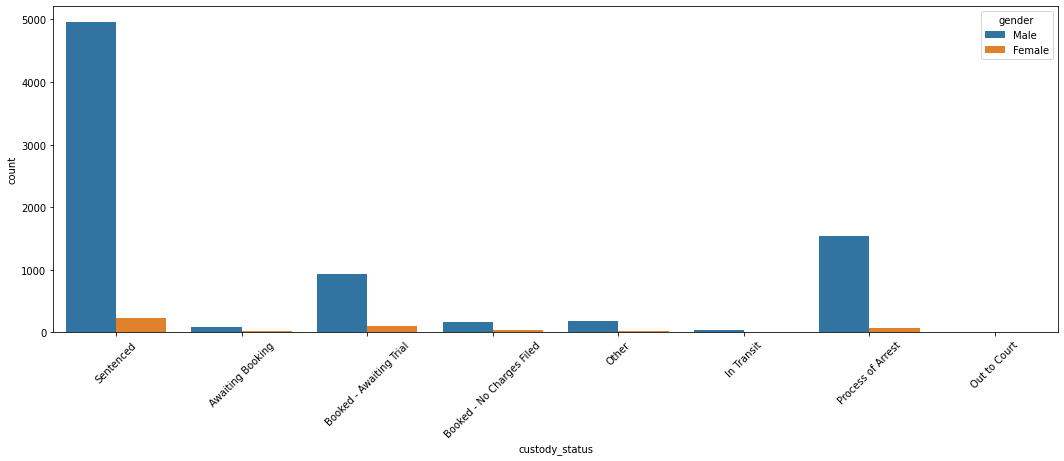

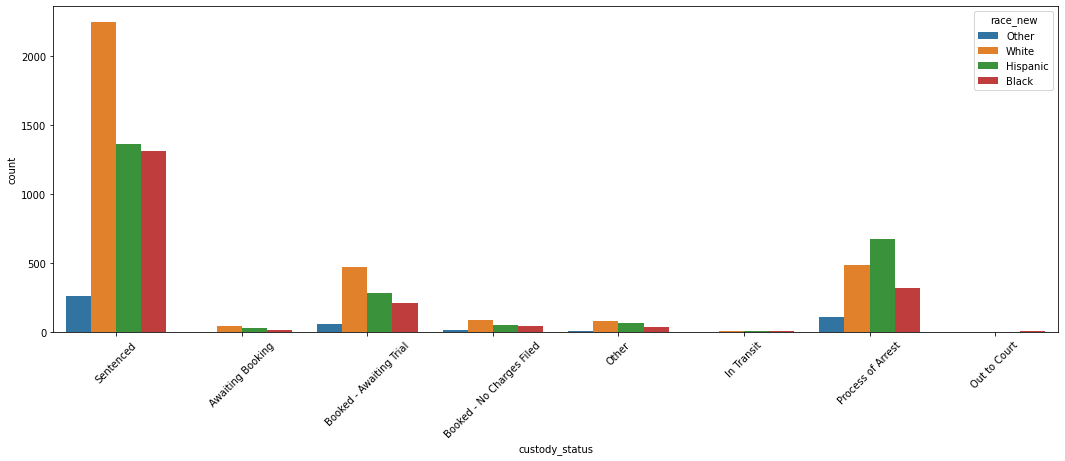

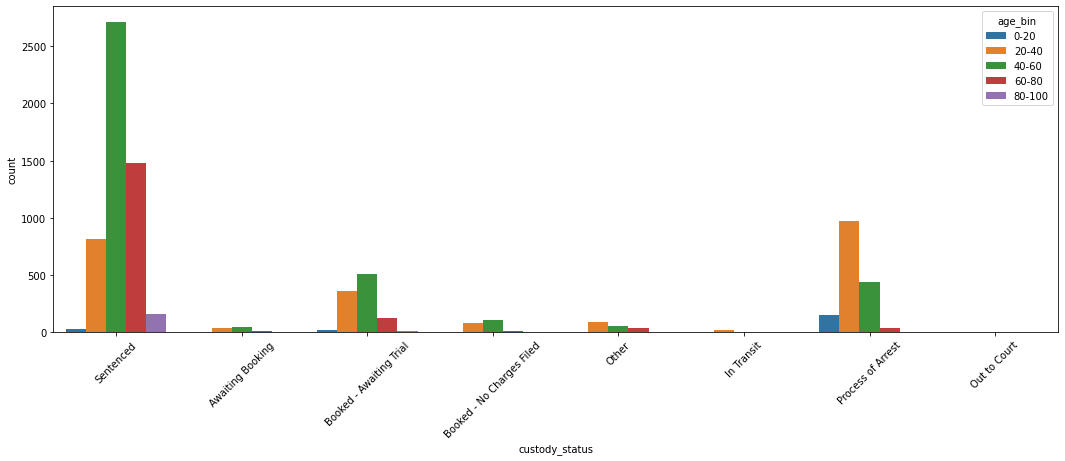

In [134]:
# Create function to plot histogram charts of each independent variable as a function of the protected class variables (gender, race and age)

def plot_feature(field): 
  # fig, ax =plt.subplots(1,3, figsize=(18, 6) )
  plt.figure(figsize=(18,6))
  sns.countplot(data=df, x=field, hue="gender") ;
  plt.xticks(rotation=45)
  plt.figure(figsize=(18,6))
  sns.countplot(data=df, x=field, hue="race_new" ) ;
  plt.xticks(rotation=45)
  plt.figure(figsize=(18,6))
  sns.countplot(data=df, x=field, hue="age_bin" ) ;
  plt.xticks(rotation=45)

plot_feature("custody_status")  

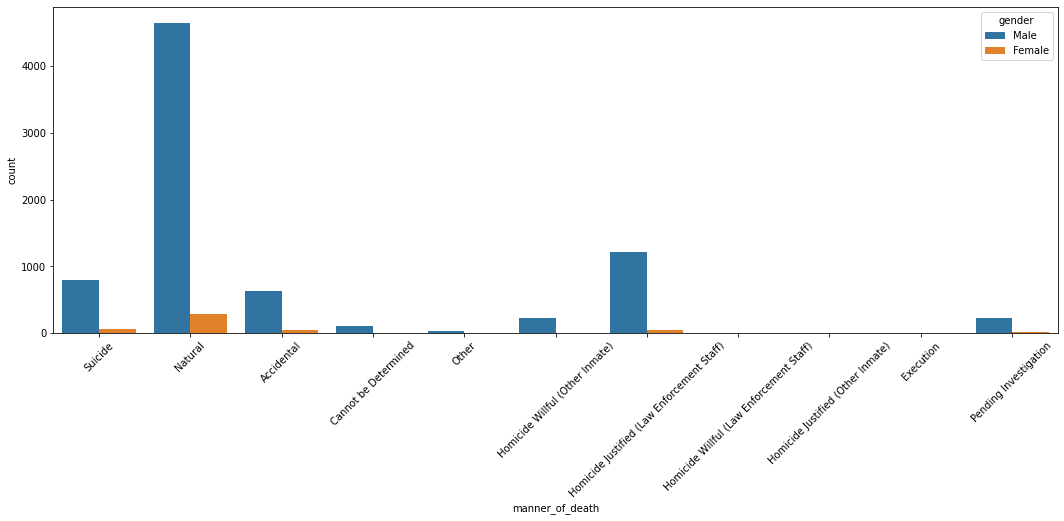

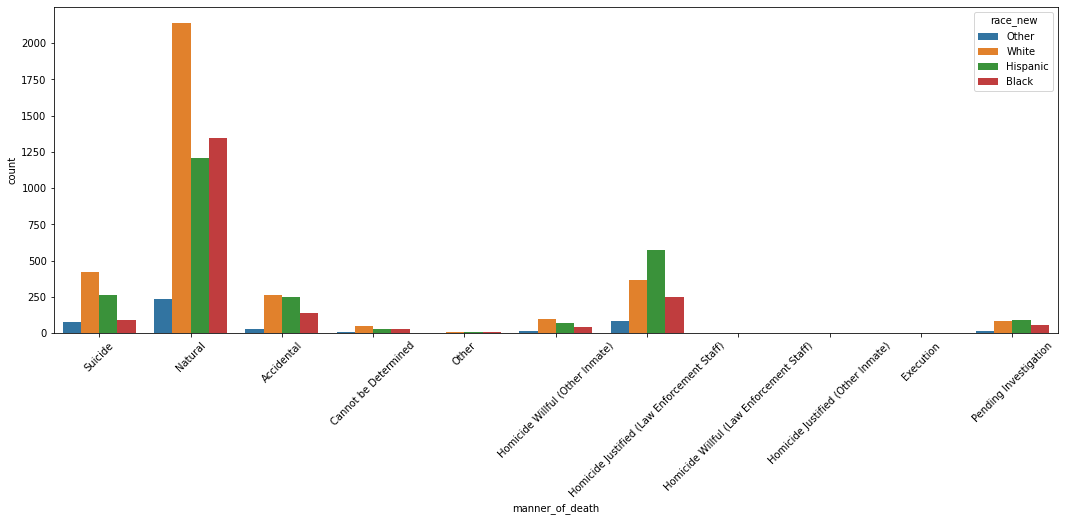

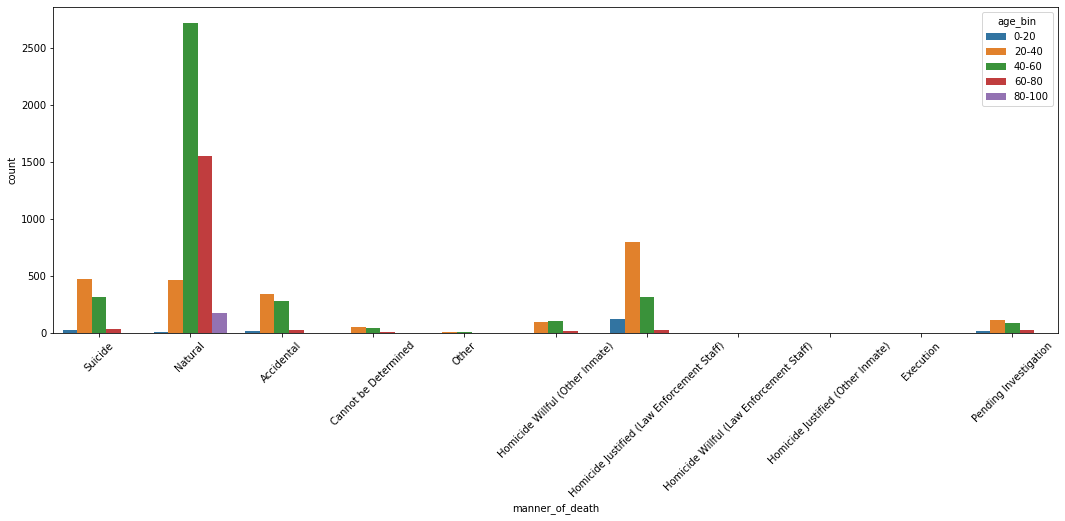

In [135]:
#plot histogram charts of manner of death as a function of the protected class variables (gender, race and age)

plot_feature("manner_of_death")

In [136]:
# Get total value counts for each gender

df.gender.value_counts()

Male      7901
Female     471
Name: gender, dtype: int64

## Step 4 - *Show how to manipulate with data* (Manipulations vs None)

Select one protected class variable (independent variable) and one dependent variable. 1) Create a graph
to support the “fairness” hypothesis: The system is fair. There is no difference in the outcomes. 2) Create
a graph to support the bias hypothesis: The system is biased. There is a difference in the outcomes. For
each, provide a brief description of your manipulations.

In [137]:
# Show columns in the dataframe

df.columns

Index(['record_key_number', 'reporting_agency', 'agency_number',
       'agency_full_name', 'county', 'race', 'gender', 'age', 'custody_status',
       'custody_offense', 'date_of_death_yyyy', 'date_of_death_mm',
       'date_of_death_dd', 'custodial_responsibilty_at_time_of_death',
       'location_where_cause_of_death_occurred', 'facility_of_death',
       'manner_of_death', 'means_of_death', 'race_cat', 'race_new', 'age_bin'],
      dtype='object')

In [138]:
# Display unique value fields for manber of death column

df.manner_of_death.unique()

array(['Suicide', 'Natural', 'Accidental', 'Cannot be Determined',
       'Other', 'Homicide Willful (Other Inmate)',
       'Homicide Justified (Law Enforcement Staff)',
       'Homicide Willful (Law Enforcement Staff)',
       'Homicide Justified (Other Inmate)', 'Execution',
       'Pending Investigation'], dtype=object)

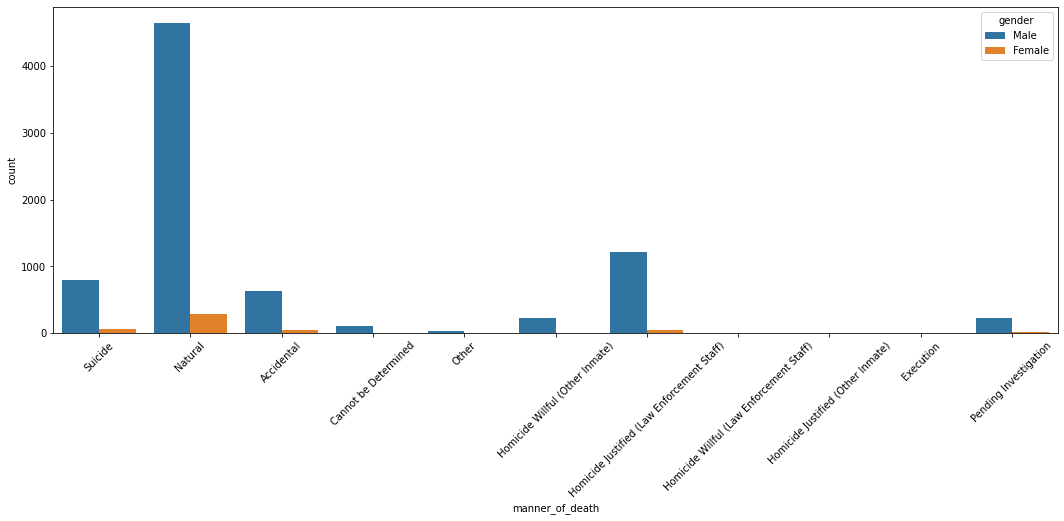

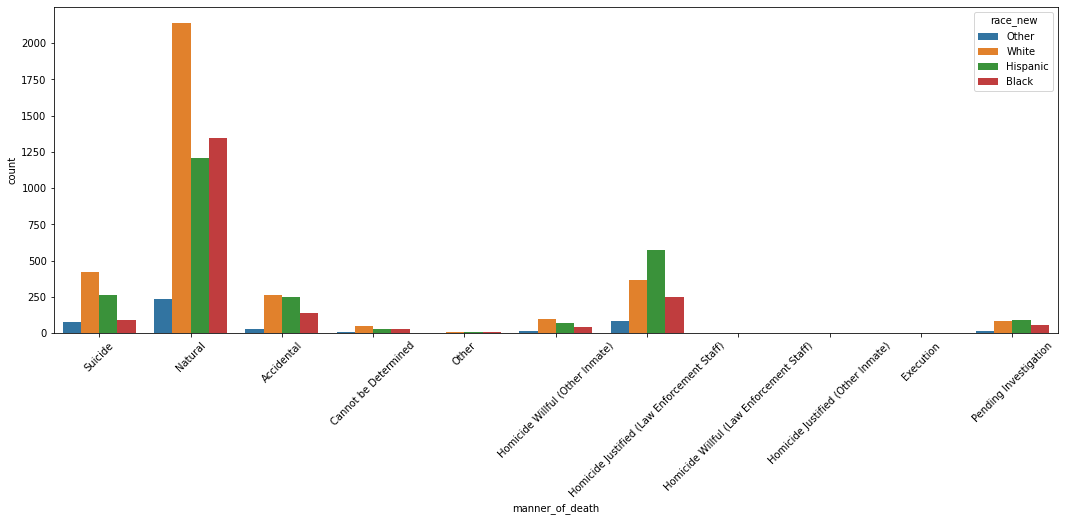

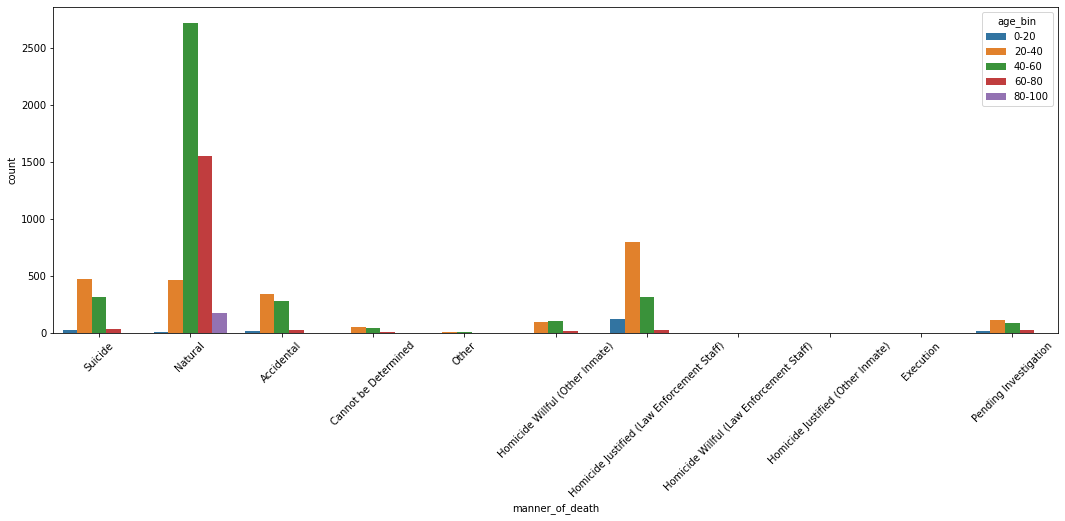

In [139]:
plot_feature("manner_of_death")

White Natural Death is More than that of other races


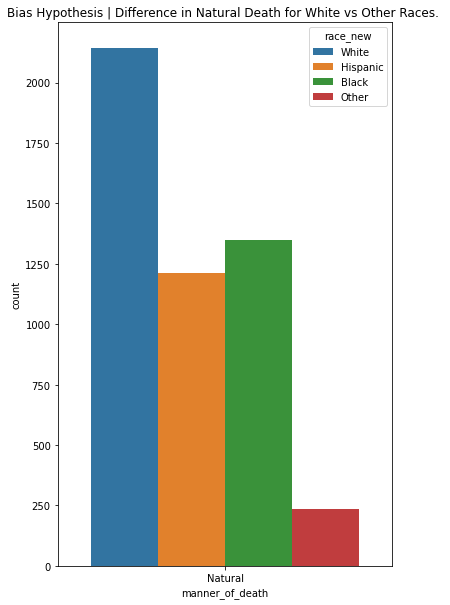

In [140]:
# Plot a graph showing bias hypothesis for Difference in Natural death between races

plt.figure(figsize=(6,10))
sns.countplot(data=df[df.manner_of_death == "Natural"], x="manner_of_death", hue="race_new") ;
plt.title("Bias Hypothesis | Difference in Natural Death for White vs Other Races. ")
print("White Natural Death is More than that of other races")

In [141]:
# Create race groups and their counts for Natural death

df_natural = (df[df.manner_of_death == "Natural"]["race_new"].value_counts())
df_natural = pd.DataFrame(df_natural)
df_natural["race"] = df_natural.index 
df_natural["freq"] = df_natural.race_new
df_natural.reset_index()
df_natural 

,race_new,race,freq
White,2142,White,2142
Black,1348,Black,1348
Hispanic,1211,Hispanic,1211
Other,234,Other,234


Text(0.5, 1.0, 'Natural Death Count for Several Races')

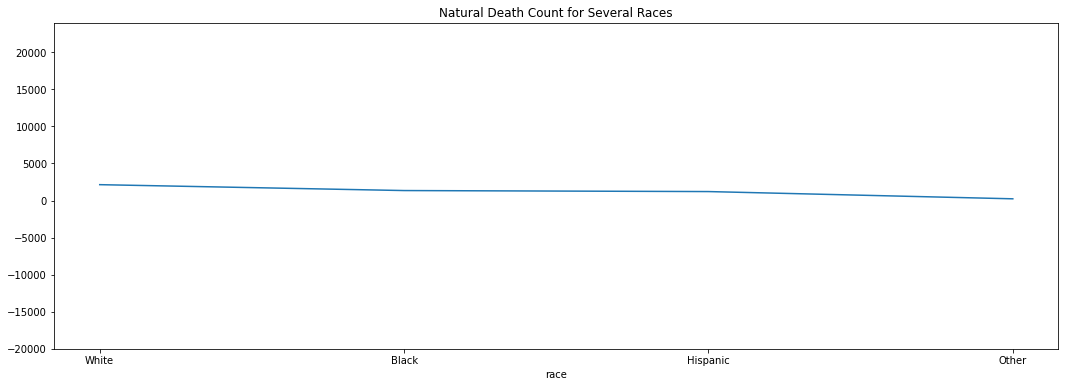

In [142]:
# For race group counts in Natural death earlier created, create a line plot to show natural death count for races

plt.figure(figsize=(18,6))
g=sns.lineplot(data=df_natural, x="race", y="freq")
g.set(ylim=(-20000, 24000))
g.set_ylabel("")
plt.title("Natural Death Count for Several Races")

Male prison sentences are more than female sentences


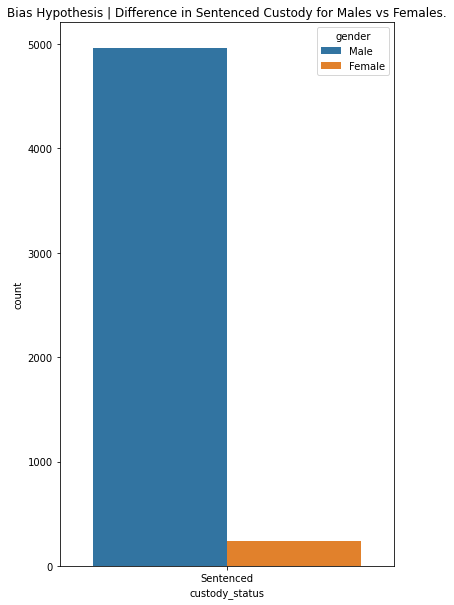

In [143]:
# Plot a graph showing bias hypothesis for Difference in Sentenced custody status between genders

plt.figure(figsize=(6,10))
sns.countplot(data=df_clean[df_clean.custody_status == "Sentenced"], x="custody_status", hue="gender") ;
plt.title("Bias Hypothesis | Difference in Sentenced Custody for Males vs Females.")
print("Male prison sentences are more than female sentences")

In [144]:
# display dataframe of males and females with sentenced custody status

df_Sentenced1 = (df_clean[df_clean.custody_status == "Sentenced"]["gender"].value_counts())
df_Sentenced1 = pd.DataFrame(df_Sentenced1)
df_Sentenced1["gender"] = df_Sentenced1.index
df_Sentenced1["frequency"] = df_clean[df_clean.custody_status == "Sentenced"]["gender"].value_counts()
#df_Sentenced1.reset_index()
df_Sentenced1

,gender,frequency
Male,Male,4961
Female,Female,234


Text(0.5, 1.0, 'Fair Hypothesis | Difference in Sentenced Custody Status count for Males and Females')

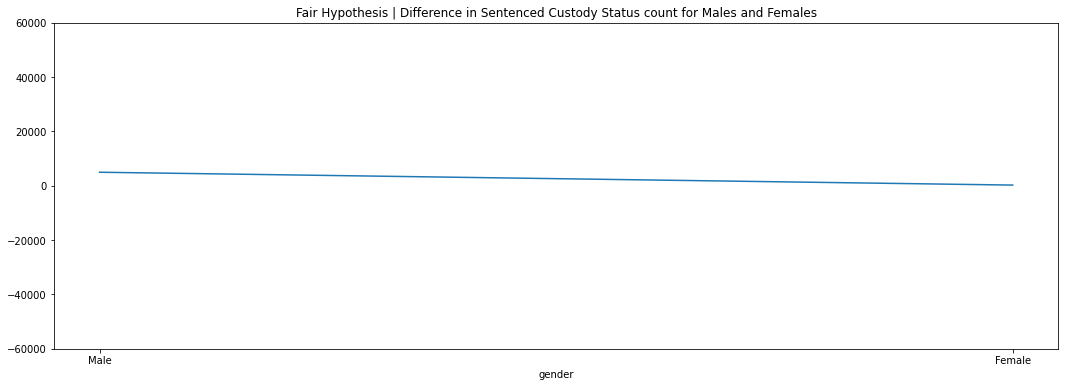

In [145]:
# Plot a graph showing Fair hypothesis for Difference in Sentenced custody status between genders

plt.figure(figsize=(18,6))
h=sns.lineplot(data=df_Sentenced1, x="gender", y="frequency")
h.set(ylim=(-60000, 60000))
h.set_ylabel("")
plt.title("Fair Hypothesis | Difference in Sentenced Custody Status count for Males and Females")

Male prison sentences are more than female sentences


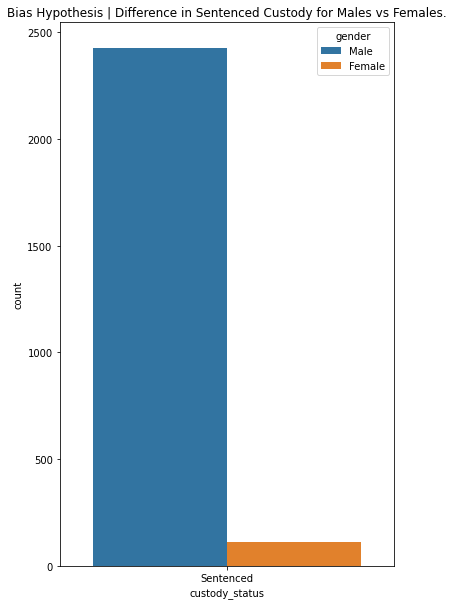

In [146]:
# Plot a graph showing bias hypothesis for Difference in Sentenced custody status between genders for reduced dataset

plt.figure(figsize=(6,10))
sns.countplot(data=part_50[part_50.custody_status == "Sentenced"], x="custody_status", hue="gender") ;
plt.title("Bias Hypothesis | Difference in Sentenced Custody for Males vs Females.")
print("Male prison sentences are more than female sentences")

In [147]:
# display dataframe of males and females with sentenced custody status for reduced dataset

df_Sentenced = (part_50[part_50.custody_status == "Sentenced"]["gender"].value_counts())
df_Sentenced = pd.DataFrame(df_Sentenced)
df_Sentenced["gender"] = df_Sentenced.index
df_Sentenced["frequency"] = part_50[part_50.custody_status == "Sentenced"]["gender"].value_counts()
#df_Sentenced.reset_index()
df_Sentenced

,gender,frequency
Male,Male,2425
Female,Female,114


Text(0.5, 1.0, 'Fair Hypothesis | Difference in Sentenced Custody Status count for Males and Females')

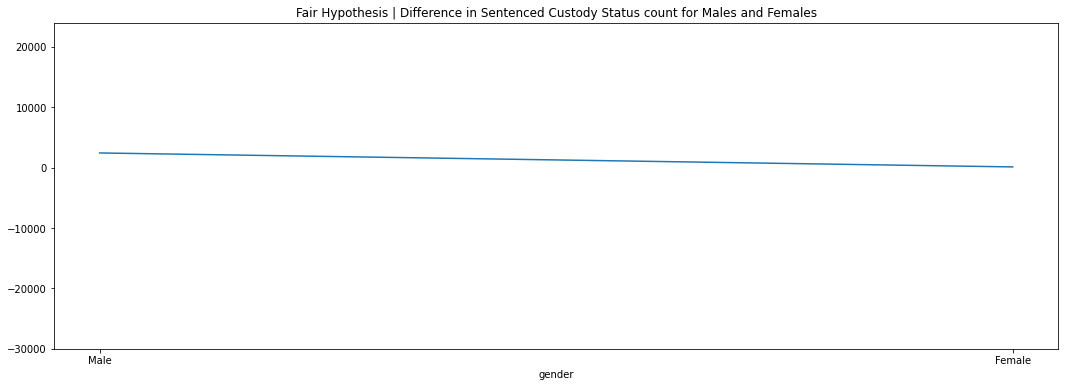

In [148]:
# Plot a graph showing Fair hypothesis for Difference in Sentenced custody status between genders for reduced dataset

plt.figure(figsize=(18,6))
h=sns.lineplot(data=df_Sentenced, x="gender", y="frequency")
h.set(ylim=(-30000, 24000))
h.set_ylabel("")
plt.title("Fair Hypothesis | Difference in Sentenced Custody Status count for Males and Females")

In [149]:
# Display count for males and females in custody status in reduced dataset

part_50.groupby(['gender','custody_status'], axis='rows')['custody_status'].count()

gender  custody_status           
Female  Awaiting Booking               11
        Booked - Awaiting Trial        53
        Booked - No Charges Filed      14
        In Transit                      2
        Other                          10
        Process of Arrest              28
        Sentenced                     114
Male    Awaiting Booking               42
        Booked - Awaiting Trial       466
        Booked - No Charges Filed      88
        In Transit                     22
        Other                          99
        Out to Court                    7
        Process of Arrest             805
        Sentenced                    2425
Name: custody_status, dtype: int64

## Step 5: 
Given your selected protected class variable (independent variable), calculate the average (using
mean, median, and mode) of the protected class group (Hint: Variables might need to be converted to
numerical values as needed). Run the random sampling method using 50% of the data to create a reduced
dataset. Calculate the average (mean, median, and mode) of the protected class group. Indicate if there is
a difference (or not) between the original dataset and the reduced dataset for any of the averages. Provide
all results.

In [150]:
# Random sampling using 50% of the original dataset to create a reduced dataset

part_50 = df.sample(frac = 0.5)
 
# Creating dataframe with
# rest of the 50% values
rest_part_50 = df.drop(part_50.index)
 
print("\n50% of the given DataFrame:")
print(part_50)
 
print("\nrest 50% of the given DataFrame:")
print(rest_part_50)


50% of the given DataFrame:
      record_key_number reporting_agency agency_number  \
4799            2012028            State        36015C   
291             2005292            State        33045C   
4985            2012214            State        37015C   
7715            2016034            State        199900   
2154            2008098            State        48015C   
...                 ...              ...           ...   
3621            2010253            State        40015C   
7967            2016286            State        21015C   
1158            2006513           Police        194200   
7739            2016058           Police        300100   
1606            2007231            State        48015C   

                         agency_full_name           county      race gender  \
4799       California Institution for Men   San Bernardino     Black   Male   
291       Chuckawalla Valley State Prison        Riverside     Black   Male   
4985  R. J. Donovan Correctional Faci

In [151]:
# Display the 50% randomized sample dataframe

part_50

,record_key_number,reporting_agency,agency_number,agency_full_name,county,race,gender,age,custody_status,custody_offense,...,date_of_death_mm,date_of_death_dd,custodial_responsibilty_at_time_of_death,location_where_cause_of_death_occurred,facility_of_death,manner_of_death,means_of_death,race_cat,race_new,age_bin
4799,2012028,State,36015C,California Institution for Men,San Bernardino,Black,Male,63,Sentenced,821,...,1,14,CDC/CRC,Not Applicable,Local Hospital,Natural,Not Applicable,Black,Black,60-80
291,2005292,State,33045C,Chuckawalla Valley State Prison,Riverside,Black,Male,45,Sentenced,881,...,6,22,CDC/CRC,Not Applicable,Local Hospital,Natural,Not Applicable,Black,Black,40-60
4985,2012214,State,37015C,R. J. Donovan Correctional Facility,San Diego,White,Male,76,Sentenced,110,...,5,3,CDC/CRC,Not Applicable,Local Hospital,Natural,Not Applicable,White,White,60-80
7715,2016034,State,199900,California Highway Patrol,Los Angeles,Other,Male,32,Process of Arrest,86,...,1,29,Process of Arrest,Crime/Arrest Scene,Local Hospital,Accidental,Other,Other,Other,20-40
2154,2008098,State,48015C,California Medical Facility,Solano,White,Male,52,Sentenced,100,...,3,2,CDC/CRC,Not Applicable,Local Hospital,Natural,Not Applicable,White,White,40-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3621,2010253,State,40015C,California Men's Colony,San Luis Obispo,Hispanic,Male,49,Sentenced,800,...,6,13,CDC/CRC,Not Applicable,Local Hospital,Natural,Not Applicable,Hispanic,Hispanic,40-60
7967,2016286,State,21015C,San Quentin State Prison,Marin,Black,Male,61,Sentenced,200,...,6,26,CDC/CRC,Not Applicable,Local Hospital,Natural,Not Applicable,Black,Black,60-80
1158,2006513,Police,194200,Los Angeles Police Department,Los Angeles,White,Male,40,Booked - Awaiting Trial,397,...,11,17,City Jail,Living,Local Hospital,Suicide,"Hanging,Strangulation",White,White,20-40
7739,2016058,Police,300100,Anaheim Police Department,Orange,Hispanic,Male,22,Process of Arrest,346,...,2,9,Process of Arrest,Crime/Arrest Scene,Local Hospital,Homicide Justified (Law Enforcement Staff),Handgun,Hispanic,Hispanic,20-40


In [152]:
# Display total gender counts in reduced dataset

part_50.gender.value_counts()

Male      3940
Female     246
Name: gender, dtype: int64

In [153]:
# Display summary statistics of reduced dataset

part_50.describe()

,record_key_number,age,custody_offense,date_of_death_yyyy,date_of_death_mm,date_of_death_dd
count,4.186000e+03,4186.000000,4186.000000,4186.000000,4186.000000,4186.000000
mean,2.010903e+06,48.598662,419.000717,2010.551839,6.465361,15.491639
std,3.479423e+03,15.578742,274.659021,3.464214,3.437424,8.831087
min,2.005004e+06,14.000000,0.000000,2005.000000,1.000000,1.000000
25%,2.007651e+06,37.000000,150.000000,2007.000000,3.000000,8.000000
50%,2.011086e+06,49.000000,341.000000,2011.000000,6.000000,16.000000
75%,2.014064e+06,59.000000,700.000000,2014.000000,9.000000,23.000000
max,2.016688e+06,96.000000,998.000000,2016.000000,12.000000,31.000000


In [154]:
# View data types for columns in reduced dataset

part_50.dtypes

record_key_number                              int64
reporting_agency                              object
agency_number                                 object
agency_full_name                              object
county                                        object
race                                          object
gender                                        object
age                                            int64
custody_status                                object
custody_offense                                int64
date_of_death_yyyy                             int64
date_of_death_mm                               int64
date_of_death_dd                               int64
custodial_responsibilty_at_time_of_death      object
location_where_cause_of_death_occurred        object
facility_of_death                             object
manner_of_death                               object
means_of_death                                object
race_cat                                      

In [155]:
part_50['gender_code'] = part_50['gender']

part_50

,record_key_number,reporting_agency,agency_number,agency_full_name,county,race,gender,age,custody_status,custody_offense,...,date_of_death_dd,custodial_responsibilty_at_time_of_death,location_where_cause_of_death_occurred,facility_of_death,manner_of_death,means_of_death,race_cat,race_new,age_bin,gender_code
4799,2012028,State,36015C,California Institution for Men,San Bernardino,Black,Male,63,Sentenced,821,...,14,CDC/CRC,Not Applicable,Local Hospital,Natural,Not Applicable,Black,Black,60-80,Male
291,2005292,State,33045C,Chuckawalla Valley State Prison,Riverside,Black,Male,45,Sentenced,881,...,22,CDC/CRC,Not Applicable,Local Hospital,Natural,Not Applicable,Black,Black,40-60,Male
4985,2012214,State,37015C,R. J. Donovan Correctional Facility,San Diego,White,Male,76,Sentenced,110,...,3,CDC/CRC,Not Applicable,Local Hospital,Natural,Not Applicable,White,White,60-80,Male
7715,2016034,State,199900,California Highway Patrol,Los Angeles,Other,Male,32,Process of Arrest,86,...,29,Process of Arrest,Crime/Arrest Scene,Local Hospital,Accidental,Other,Other,Other,20-40,Male
2154,2008098,State,48015C,California Medical Facility,Solano,White,Male,52,Sentenced,100,...,2,CDC/CRC,Not Applicable,Local Hospital,Natural,Not Applicable,White,White,40-60,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3621,2010253,State,40015C,California Men's Colony,San Luis Obispo,Hispanic,Male,49,Sentenced,800,...,13,CDC/CRC,Not Applicable,Local Hospital,Natural,Not Applicable,Hispanic,Hispanic,40-60,Male
7967,2016286,State,21015C,San Quentin State Prison,Marin,Black,Male,61,Sentenced,200,...,26,CDC/CRC,Not Applicable,Local Hospital,Natural,Not Applicable,Black,Black,60-80,Male
1158,2006513,Police,194200,Los Angeles Police Department,Los Angeles,White,Male,40,Booked - Awaiting Trial,397,...,17,City Jail,Living,Local Hospital,Suicide,"Hanging,Strangulation",White,White,20-40,Male
7739,2016058,Police,300100,Anaheim Police Department,Orange,Hispanic,Male,22,Process of Arrest,346,...,9,Process of Arrest,Crime/Arrest Scene,Local Hospital,Homicide Justified (Law Enforcement Staff),Handgun,Hispanic,Hispanic,20-40,Male


In [156]:
# Create number codes for genders in reduced dataset

part_50.gender_code.replace('Male', 1, inplace=True)
part_50.gender_code.replace('Female', 0, inplace=True)

part_50

,record_key_number,reporting_agency,agency_number,agency_full_name,county,race,gender,age,custody_status,custody_offense,...,date_of_death_dd,custodial_responsibilty_at_time_of_death,location_where_cause_of_death_occurred,facility_of_death,manner_of_death,means_of_death,race_cat,race_new,age_bin,gender_code
4799,2012028,State,36015C,California Institution for Men,San Bernardino,Black,Male,63,Sentenced,821,...,14,CDC/CRC,Not Applicable,Local Hospital,Natural,Not Applicable,Black,Black,60-80,1
291,2005292,State,33045C,Chuckawalla Valley State Prison,Riverside,Black,Male,45,Sentenced,881,...,22,CDC/CRC,Not Applicable,Local Hospital,Natural,Not Applicable,Black,Black,40-60,1
4985,2012214,State,37015C,R. J. Donovan Correctional Facility,San Diego,White,Male,76,Sentenced,110,...,3,CDC/CRC,Not Applicable,Local Hospital,Natural,Not Applicable,White,White,60-80,1
7715,2016034,State,199900,California Highway Patrol,Los Angeles,Other,Male,32,Process of Arrest,86,...,29,Process of Arrest,Crime/Arrest Scene,Local Hospital,Accidental,Other,Other,Other,20-40,1
2154,2008098,State,48015C,California Medical Facility,Solano,White,Male,52,Sentenced,100,...,2,CDC/CRC,Not Applicable,Local Hospital,Natural,Not Applicable,White,White,40-60,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3621,2010253,State,40015C,California Men's Colony,San Luis Obispo,Hispanic,Male,49,Sentenced,800,...,13,CDC/CRC,Not Applicable,Local Hospital,Natural,Not Applicable,Hispanic,Hispanic,40-60,1
7967,2016286,State,21015C,San Quentin State Prison,Marin,Black,Male,61,Sentenced,200,...,26,CDC/CRC,Not Applicable,Local Hospital,Natural,Not Applicable,Black,Black,60-80,1
1158,2006513,Police,194200,Los Angeles Police Department,Los Angeles,White,Male,40,Booked - Awaiting Trial,397,...,17,City Jail,Living,Local Hospital,Suicide,"Hanging,Strangulation",White,White,20-40,1
7739,2016058,Police,300100,Anaheim Police Department,Orange,Hispanic,Male,22,Process of Arrest,346,...,9,Process of Arrest,Crime/Arrest Scene,Local Hospital,Homicide Justified (Law Enforcement Staff),Handgun,Hispanic,Hispanic,20-40,1


In [157]:
# Create number codes for the race groups or categories in reduced dataset

part_50['race_code'] = part_50['race_cat']

part_50.race_code.replace('White', 1, inplace=True)
part_50.race_code.replace('Black', 2, inplace=True)
part_50.race_code.replace('Hispanic', 3, inplace=True)
part_50.race_code.replace('Other', 4, inplace=True)

part_50

,record_key_number,reporting_agency,agency_number,agency_full_name,county,race,gender,age,custody_status,custody_offense,...,custodial_responsibilty_at_time_of_death,location_where_cause_of_death_occurred,facility_of_death,manner_of_death,means_of_death,race_cat,race_new,age_bin,gender_code,race_code
4799,2012028,State,36015C,California Institution for Men,San Bernardino,Black,Male,63,Sentenced,821,...,CDC/CRC,Not Applicable,Local Hospital,Natural,Not Applicable,Black,Black,60-80,1,2
291,2005292,State,33045C,Chuckawalla Valley State Prison,Riverside,Black,Male,45,Sentenced,881,...,CDC/CRC,Not Applicable,Local Hospital,Natural,Not Applicable,Black,Black,40-60,1,2
4985,2012214,State,37015C,R. J. Donovan Correctional Facility,San Diego,White,Male,76,Sentenced,110,...,CDC/CRC,Not Applicable,Local Hospital,Natural,Not Applicable,White,White,60-80,1,1
7715,2016034,State,199900,California Highway Patrol,Los Angeles,Other,Male,32,Process of Arrest,86,...,Process of Arrest,Crime/Arrest Scene,Local Hospital,Accidental,Other,Other,Other,20-40,1,4
2154,2008098,State,48015C,California Medical Facility,Solano,White,Male,52,Sentenced,100,...,CDC/CRC,Not Applicable,Local Hospital,Natural,Not Applicable,White,White,40-60,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3621,2010253,State,40015C,California Men's Colony,San Luis Obispo,Hispanic,Male,49,Sentenced,800,...,CDC/CRC,Not Applicable,Local Hospital,Natural,Not Applicable,Hispanic,Hispanic,40-60,1,3
7967,2016286,State,21015C,San Quentin State Prison,Marin,Black,Male,61,Sentenced,200,...,CDC/CRC,Not Applicable,Local Hospital,Natural,Not Applicable,Black,Black,60-80,1,2
1158,2006513,Police,194200,Los Angeles Police Department,Los Angeles,White,Male,40,Booked - Awaiting Trial,397,...,City Jail,Living,Local Hospital,Suicide,"Hanging,Strangulation",White,White,20-40,1,1
7739,2016058,Police,300100,Anaheim Police Department,Orange,Hispanic,Male,22,Process of Arrest,346,...,Process of Arrest,Crime/Arrest Scene,Local Hospital,Homicide Justified (Law Enforcement Staff),Handgun,Hispanic,Hispanic,20-40,1,3


In [158]:
# summary statistics of gender and race groups in reduced dataset

part_50[["race_code","gender_code"]].describe(include="all")

,race_code,gender_code
count,4186.0,4186.000000
unique,17.0,NaN
top,1.0,NaN
freq,1739.0,NaN
mean,NaN,0.941233
std,NaN,0.235217
min,NaN,0.000000
25%,NaN,1.000000
50%,NaN,1.000000
75%,NaN,1.000000


In [159]:
# Display summary statistics for all columns in reduced dataset

part_50.describe(include="all")

,record_key_number,reporting_agency,agency_number,agency_full_name,county,race,gender,age,custody_status,custody_offense,...,custodial_responsibilty_at_time_of_death,location_where_cause_of_death_occurred,facility_of_death,manner_of_death,means_of_death,race_cat,race_new,age_bin,gender_code,race_code
count,4.186000e+03,4186,4186,4186,4186,4186,4186,4186.000000,4186,4186.000000,...,4186,4182,4186,4186,4186,4186,4186,4186,4186.000000,4186.0
unique,NaN,5,285,258,51,17,2,NaN,8,NaN,...,8,10,9,10,13,17,4,5,NaN,17.0
top,NaN,State,48015C,California Medical Facility,Los Angeles,White,Male,NaN,Sentenced,NaN,...,CDC/CRC,Not Applicable,Local Hospital,Natural,Not Applicable,White,White,40-60,NaN,1.0
freq,NaN,2538,466,466,549,1739,3940,NaN,2613,NaN,...,2250,1718,1694,2488,2488,1739,1739,1935,NaN,1739.0
mean,2.010903e+06,NaN,NaN,NaN,NaN,NaN,NaN,48.598662,NaN,419.000717,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.941233,NaN
std,3.479423e+03,NaN,NaN,NaN,NaN,NaN,NaN,15.578742,NaN,274.659021,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.235217,NaN
min,2.005004e+06,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
25%,2.007651e+06,NaN,NaN,NaN,NaN,NaN,NaN,37.000000,NaN,150.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
50%,2.011086e+06,NaN,NaN,NaN,NaN,NaN,NaN,49.000000,NaN,341.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
75%,2.014064e+06,NaN,NaN,NaN,NaN,NaN,NaN,59.000000,NaN,700.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN


In [160]:
# Descriptive statistics for reduced dataset

part_50.describe()

,record_key_number,age,custody_offense,date_of_death_yyyy,date_of_death_mm,date_of_death_dd,gender_code
count,4.186000e+03,4186.000000,4186.000000,4186.000000,4186.000000,4186.000000,4186.000000
mean,2.010903e+06,48.598662,419.000717,2010.551839,6.465361,15.491639,0.941233
std,3.479423e+03,15.578742,274.659021,3.464214,3.437424,8.831087,0.235217
min,2.005004e+06,14.000000,0.000000,2005.000000,1.000000,1.000000,0.000000
25%,2.007651e+06,37.000000,150.000000,2007.000000,3.000000,8.000000,1.000000
50%,2.011086e+06,49.000000,341.000000,2011.000000,6.000000,16.000000,1.000000
75%,2.014064e+06,59.000000,700.000000,2014.000000,9.000000,23.000000,1.000000
max,2.016688e+06,96.000000,998.000000,2016.000000,12.000000,31.000000,1.000000


In [161]:
# Create numeric gender codes for genders in a duplicate original dataframe 

df_clean['gender_code'] = df_clean['gender']

df_clean.gender_code.replace('Male', 1, inplace=True)
df_clean.gender_code.replace('Female', 0, inplace=True)

df_clean[["gender_code"]].describe(include="all")

,gender_code
count,8372.000000
mean,0.943741
std,0.230435
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


## Step 6

Given your reduced dataset from Step 5, Repeat Step 3 (frequency and histogram) using your
selected dependent variable as a function of your selected independent variable (from Step 4). Explain any differences (in at least 2 sentences). If you used the random sampling method, would members
associated with the protected class variable benefit or be harmed? Explain your reasoning (in at least 2
sentences).

In [162]:
# Show the count for the grouping of manner of death by gender (male and female) in reduced dataset

part_50.groupby(['gender','manner_of_death'], axis='rows')['manner_of_death'].count()

gender  manner_of_death                           
Female  Accidental                                      30
        Cannot be Determined                             4
        Homicide Justified (Law Enforcement Staff)      26
        Homicide Willful (Other Inmate)                  2
        Natural                                        151
        Pending Investigation                            7
        Suicide                                         26
Male    Accidental                                     311
        Cannot be Determined                            46
        Homicide Justified (Law Enforcement Staff)     600
        Homicide Justified (Other Inmate)                1
        Homicide Willful (Law Enforcement Staff)         1
        Homicide Willful (Other Inmate)                109
        Natural                                       2337
        Other                                           15
        Pending Investigation                          106
     

In [163]:
# Show the count for the grouping of custody status by gender (male and female) in reduced dataset

part_50.groupby(['gender','custody_status'], axis='rows')['custody_status'].count()

gender  custody_status           
Female  Awaiting Booking                6
        Booked - Awaiting Trial        58
        Booked - No Charges Filed      19
        In Transit                      1
        Other                           9
        Out to Court                    1
        Process of Arrest              35
        Sentenced                     117
Male    Awaiting Booking               40
        Booked - Awaiting Trial       458
        Booked - No Charges Filed      85
        In Transit                     12
        Other                         103
        Out to Court                    8
        Process of Arrest             738
        Sentenced                    2496
Name: custody_status, dtype: int64

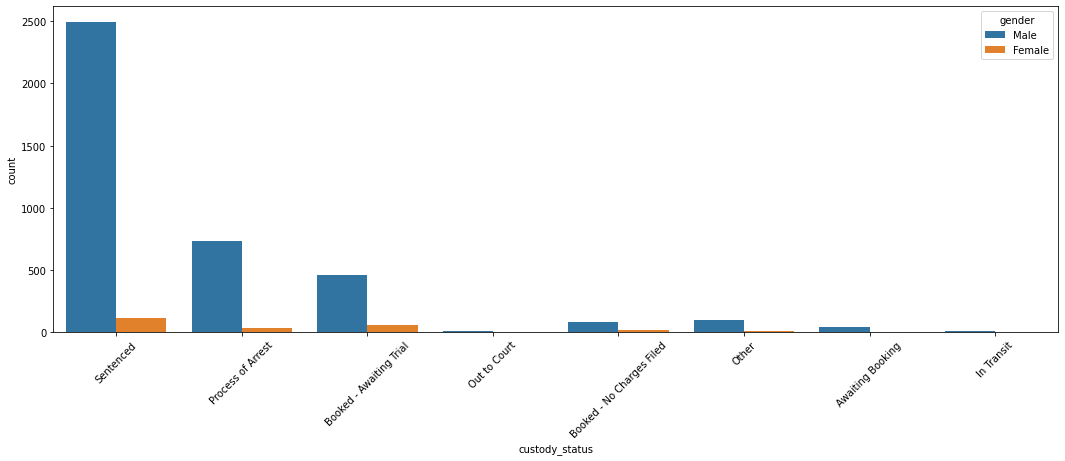

<Figure size 1296x432 with 0 Axes>

In [164]:
# Create function to plot histogram chart of independent variable as a function of the protected class variable (gender) in reduced dataset

def plot_feature2(field): 
  # fig, ax =plt.subplots(1,3, figsize=(18, 6) )
  plt.figure(figsize=(18,6))
  sns.countplot(data=part_50, x=field, hue="gender") ;
  plt.xticks(rotation=45)
  plt.figure(figsize=(18,6))
 
# plot histogram charts of custody status as a function of the protected class variable (gender) in reduced dataset

plot_feature2("custody_status")  

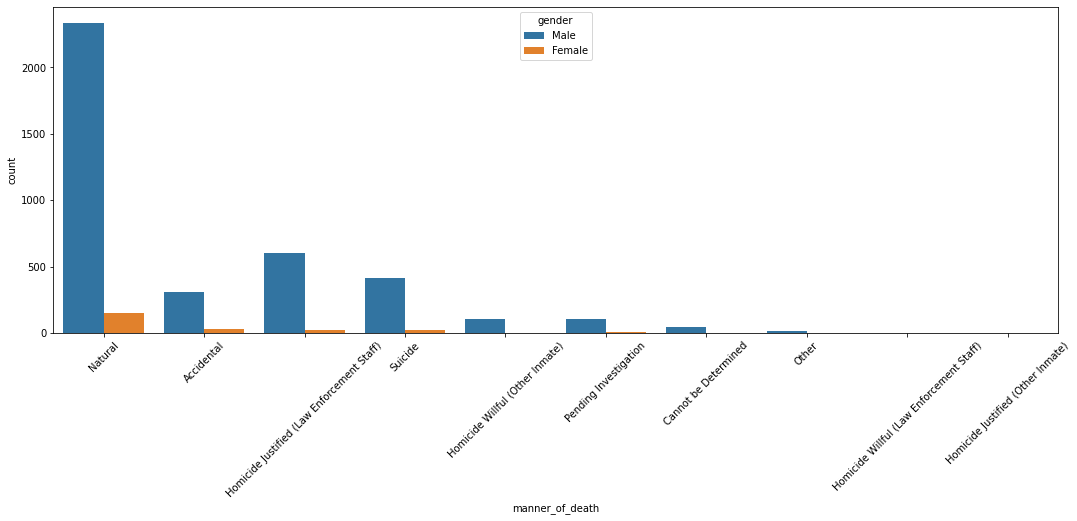

<Figure size 1296x432 with 0 Axes>

In [165]:
#plot histogram charts of manner of death as a function of the protected class variable (gender) in reduced dataset

plot_feature2("manner_of_death")